In [5]:
 !pip install networkx

In [9]:
!pip install torch-geometric

     ---------------------------------------- 0.0/63.1 kB ? eta -:--:--
     ------------ ------------------------- 20.5/63.1 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 63.1/63.1 kB 851.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.1 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 12.0 MB/s eta 0:00:00


Epoch 0, Loss: 1.2598, Adversarial: False
Epoch 10, Loss: 1.0339, Adversarial: True
Epoch 20, Loss: 1.0031, Adversarial: True
Epoch 30, Loss: 1.0004, Adversarial: True
Epoch 40, Loss: 0.9942, Adversarial: False
Epoch 50, Loss: 0.9883, Adversarial: True
Epoch 60, Loss: 0.9821, Adversarial: True
Epoch 70, Loss: 0.9747, Adversarial: True
Epoch 80, Loss: 0.9653, Adversarial: True
Epoch 90, Loss: 0.9561, Adversarial: False
Accuracy: 0.5333


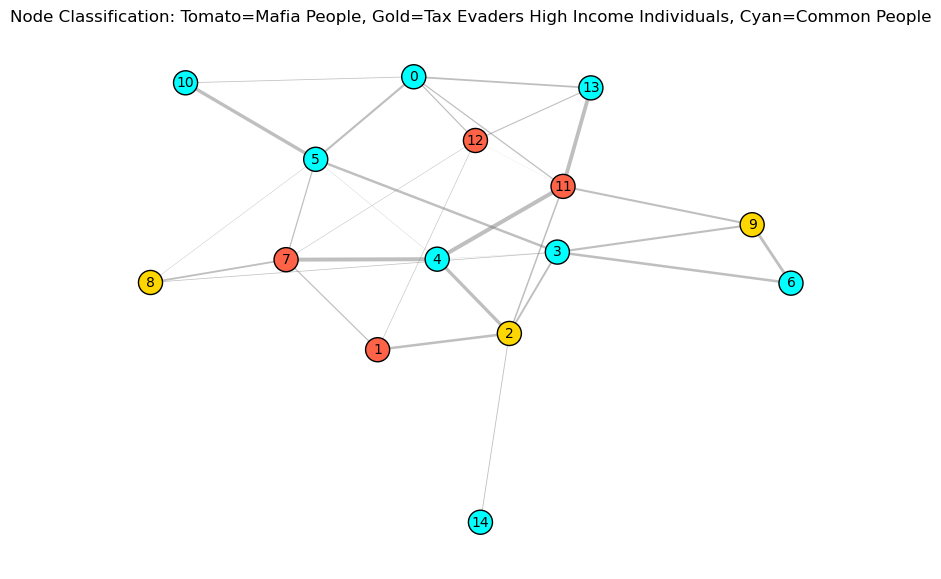

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import networkx as nx
import numpy as np
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_networkx
import matplotlib.pyplot as plt

np.random.seed(42)
torch.manual_seed(42)


n_nodes = 15
n_edges = 30


G = nx.gnm_random_graph(n_nodes, n_edges, directed=False)


node_labels = {i: np.random.choice([0, 1, 2], p=[0.6, 0.2, 0.2]) for i in G.nodes()}


for u, v in G.edges():
    G.edges[u, v]['weight'] = np.round(np.random.rand() * 10, 1)


node_features = torch.tensor([[np.random.rand(), np.random.rand()] for _ in range(n_nodes)], dtype=torch.float)


for i, label in node_labels.items():
    G.nodes[i]['label'] = label
data = from_networkx(G)
data.x = node_features
data.y = torch.tensor([node_labels[i] for i in G.nodes()], dtype=torch.long)  # Ensure dtype=torch.long

# GNN model
class SimpleGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


model = SimpleGNN(in_channels=2, hidden_channels=16, out_channels=3)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.NLLLoss()


def adversarial_perturbation(data, perturb_prob=0.1):
    data_adv = data.clone()
    # Randomly perturb node features
    mask = torch.rand(data.x.size()) < perturb_prob
    data_adv.x[mask] += torch.randn_like(data_adv.x[mask]) * 0.1
    return data_adv

# Training with adversarial
def train(model, data, epochs=100, adversarial_prob=0.5):
    model.train()
    for epoch in range(epochs):
        
        optimizer.zero_grad()

        
        use_adversarial = np.random.rand() < adversarial_prob
        input_data = adversarial_perturbation(data) if use_adversarial else data

        
        out = model(input_data.x, input_data.edge_index)
        loss = criterion(out, data.y)

    
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}, Adversarial: {use_adversarial}')


train(model, data)

model.eval()
with torch.no_grad():
    pred = model(data.x, data.edge_index).argmax(dim=1)
    accuracy = (pred == data.y).sum().item() / len(data.y)
    print(f'Accuracy: {accuracy:.4f}')

# Visualize node classifications
node_colors = ['tomato' if label == 2 else 'gold' if label == 1 else 'cyan' for label in data.y]
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300, edgecolors="k")
nx.draw_networkx_edges(G, pos, width=[G.edges[u, v]['weight'] * 0.3 for u, v in G.edges()], alpha=0.5, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Node Classification: Tomato=Mafia People, Gold=Tax Evaders High Income Individuals, Cyan=Common People")
plt.axis("off")
plt.show()


In [26]:
!pip install torch torch-geometric scikit-learn seaborn


In [28]:
!pip install transformers
from transformers import 
import torch

# Initialize the Minerva model and tokenizer
tokenizer = MinervaTokenizer.from_pretrained('minerva')
model = MinervaModel.from_pretrained('minerva')

def extract_text_features(texts):
    """ Extract features from a list of texts using Minerva. """
    encoded_input = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**encoded_input)
    # Take the last hidden state as the feature representation
    return outputs.last_hidden_state.mean(dim=1)  # Average pooling


     ---------------------------------------- 0.0/44.1 kB ? eta -:--:--
     -------------------------- ----------- 30.7/44.1 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 44.1/44.1 kB 721.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.0 MB 15.9 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/10.0 MB 15.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/10.0 MB 18.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/10.0 MB 21.0 MB/s eta 0:00:01
   ------------------- -------------------- 4.8/10.0 MB 21.9 MB/s eta 0:00:01
   ------------------------ --------------- 6.1/10.0 MB 23.1 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/10.0 MB 22.3 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/10.0 MB 22.1 MB/s eta 0:00:01
   ----------------------------------- ---- 8.9/10.0 MB 21.2 MB/s eta 0:00

ImportError: cannot import name 'MinervaTokenizer' from 'transformers' (C:\Users\apurv\anaconda3\Lib\site-packages\transformers\__init__.py)